# Train Validation Test Set Split

**Description**: Split the complete dataset into three sets: train, validation and test. The split is vertical, i.e. devices are unique to a subset and are not shared between the different phases of the model training, hyperparameter tuning and testing.

**Inputs**: `data/binary/*`, `data/hex/*`

**Outputs**: `data/train_test/binary_train.csv`, `data/train_test/binary_validate.csv`, `data/train_test/binary_test.csv`, `data/train_test/hex_train.csv`, `data/train_test/hex_validate.csv`, `data/train_test/hex_test.csv`

| Train                         | Test                       |
|-------------------------------|----------------------------|
| iPhone7_X                      | iPhoneXR_U                 |
| iPhone7_F                      | GooglePixel3A_L            |
| OnePlusNord_O                  | GooglePixel3A_V            |
| SamsungS7_I                    | XiaomiRedmi5_J             |
| XiaomiRedmiNote7_S             | XiaomiRedmi4_B            |
| iPhone6_N                      | iPhone12Pro_C              |
| iPhoneXSMax_M                  | SamsungS6_H                |
| XiaomiRedmiNote9S_T            | iPhone11_F                 |
| XiaomiA2_E                     | S21Ultra_M                 |
| iPhone12_M                     | HuaweiP20_G                |
| iPhone11_C                     | SamsungS4_C                |
| iPhone12_W                     |             |
| iPhone11_B                     |                 |
| iPhone11_M                     |                  |
| HuaweiL21_D                    |             |
| OppoFindX3Neo_A                |                 |
| iPhoneXR_A                     |                |
| iPhoneXR_L                     |                 |
| HuaweiHonor9_R                 |                            |
| SamsungJ6_K                    |                            |
| SamsungM31_A                   |                            |
| HuaweiP10_Q                    |                            |


## Notebook Setup

### Libraries

In [1]:
import sys
sys.path.append('C:/Users/fabio/Documents/GitHub/CompactProbes/notebooks')
from modules import fancyData
from modules import fancyPlots
import pandas as pd
from rich import traceback
from rich.progress import Progress

In [2]:
traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x0000023C441EECF0>>

### Configurations

In [3]:
from configparser import ConfigParser

config = ConfigParser()
config.read("../config.ini")

['../config.ini']

## Device Sets

In [4]:
train_devices = [
    "iPhone7_X",
    "iPhone7_F",
    "OnePlusNord_O",
    "SamsungS7_I",
    "XiaomiRedmiNote7_S",
    "iPhone6_N",
    "iPhoneXSMax_M",
    "XiaomiRedmiNote9S_T",
    "XiaomiA2_E",
    "iPhone12_M",
    "iPhone11_C",
    "iPhone12_W",
    "iPhone11_B",
    "iPhone11_M",
    "HuaweiL21_D",
    "iPhoneXR_L",
    "HuaweiHonor9_R",
    "HuaweiP10_Q",
]

test_devices = [
    "iPhoneXR_U",
    "GooglePixel3A_L",
    "GooglePixel3A_V",
    "XiaomiRedmi5_J",
    "XiaomiRedmi4_B",
    "iPhone12Pro_C",
    "SamsungS6_H",
    "iPhone11_F",
    "S21Ultra_M",
    "HuaweiP20_G",
    "SamsungS4_C",
    "OppoFindX3Neo_A",
    "iPhoneXR_A",
    "SamsungJ6_K",
    "SamsungM31_A"
]


## HEX Data

In [5]:
hex_path = config["DEFAULT"]["hex_path"]
df_hex = fancyData.load_and_concat_csv(hex_path)
df_hex = df_hex[df_hex["MAC Address"] != "00:0f:00:6a:68:8b"]

In [6]:
df_hex

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length,Label
0,1697147353.854776423,22:3b:0c:d1:04:00,11,9,2d401bff00000000000000000000000000000000000000...,0000080400000040,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,132,iPhone11_B
1,1697147353.877196756,22:3b:0c:d1:04:00,11,9,2d401bff00000000000000000000000000000000000000...,0000080400000040,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,132,iPhone11_B
2,1697147353.84198058,a2:46:52:98:69:ef,1,3,2d401bff00000000000000000000000000000000000000...,0000080400000040,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,132,iPhone11_B
3,1697147353.843195064,a2:46:52:98:69:ef,1,3,2d401bff00000000000000000000000000000000000000...,0000080400000040,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,132,iPhone11_B
4,1697147353.989248318,56:f0:59:c1:2b:71,1,2,2d401bff00000000000000000000000000000000000000...,0000080400000040,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,132,iPhone11_B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76699,1626775271.075259,42:b1:98:56:e4:02,6,6,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,NaN,02040b16,0c1218243048606c,92f99133faff6203faff6203,02000b,165,XiaomiRedmiNote9S_T
76700,1626775271.118583,42:b1:98:56:e4:02,6,7,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,NaN,02040b16,0c1218243048606c,92f99133faff6203faff6203,02000b,165,XiaomiRedmiNote9S_T
76701,1626775271.161272,42:b1:98:56:e4:02,6,8,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,NaN,02040b16,0c1218243048606c,92f99133faff6203faff6203,02000b,165,XiaomiRedmiNote9S_T
76702,1626775271.271423,42:b1:98:56:e4:02,11,11,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,NaN,02040b16,0c1218243048606c,92f99133faff6203faff6203,02001d,153,XiaomiRedmiNote9S_T


In [7]:
df_train_hex = df_hex[df_hex["Label"].isin(train_devices)]
df_test_hex = df_hex[df_hex["Label"].isin(test_devices)]

In [8]:
from sklearn.utils import resample

# Separate the entries with label 'XiaomiRedmiNote7_S'
df_xiaomi = df_train_hex[df_train_hex["Label"] == "XiaomiRedmiNote7_S"]

# Undersample to 2000 entries
df_xiaomi_undersampled = resample(
    df_xiaomi, replace=False, n_samples=2000, random_state=42
)

# Combine with the rest of the data
df_train_hex = pd.concat(
    [
        df_train_hex[df_train_hex["Label"] != "XiaomiRedmiNote7_S"],
        df_xiaomi_undersampled,
    ]
)

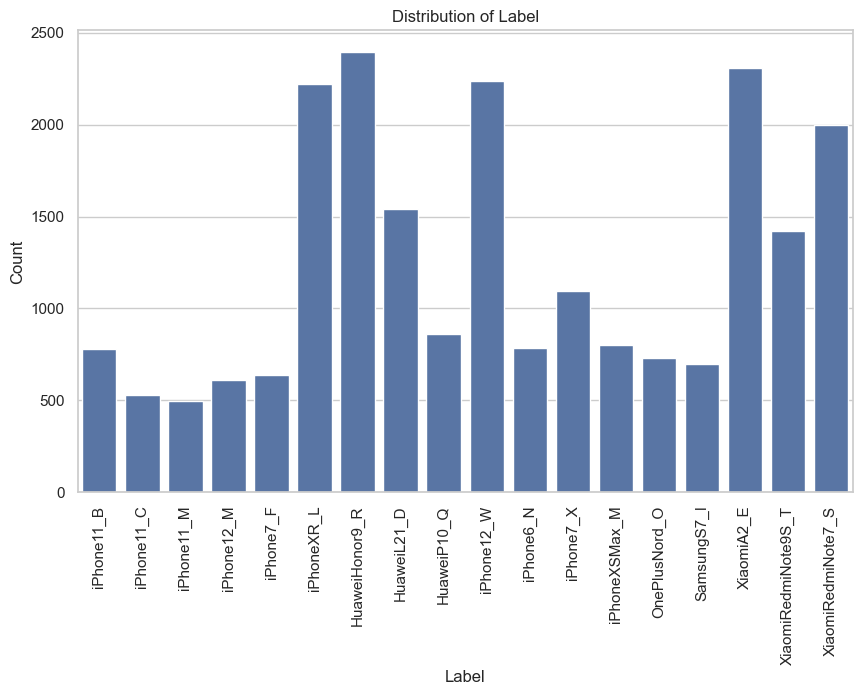

In [9]:
fancyPlots.plot_label_distribution(df_train_hex, "Label")

In [10]:
drop1 = "XiaomiRedmi4_B"  # specify the label
n_drop = df_test_hex.loc[df_test_hex["Label"]== drop1].shape[0] - 10000
print(n_drop)
# Get the indices of the last k entries with label x
indices_to_drop = df_test_hex[df_test_hex["Label"] == drop1].tail(n_drop).index

# Drop the entries
df_test_hex = df_test_hex.drop(indices_to_drop)


drop2 = "SamsungS4_C"  # specify the label
n_drop = df_test_hex.loc[df_test_hex["Label"]== drop2].shape[0] - 10000
print(n_drop)
# Get the indices of the last k entries with label x
indices_to_drop = df_test_hex[df_test_hex["Label"] == drop2].tail(n_drop).index

# Drop the entries
df_test_hex = df_test_hex.drop(indices_to_drop)

12104
4123


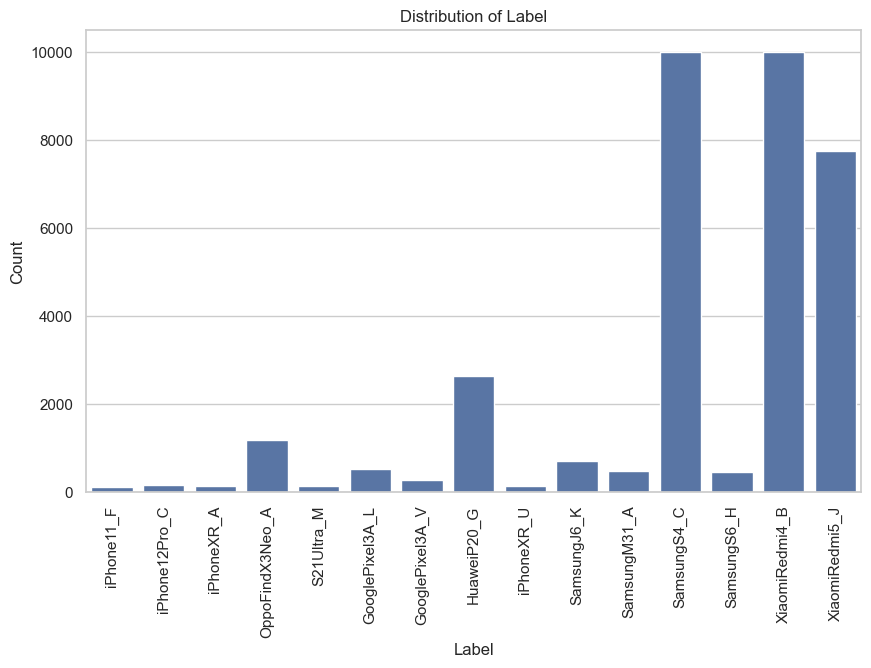

In [11]:

fancyPlots.plot_label_distribution(df_test_hex, "Label")

In [12]:
df_train_hex.to_csv(config["DEFAULT"]["train_test_path"] + "hex_train.csv", index=False)

In [13]:
df_test_hex.to_csv(config["DEFAULT"]["train_test_path"] + "hex_test.csv", index=False)

## Binary Data

In [14]:
binary_path = config["DEFAULT"]["interim_path"] + "binary_U_random.csv"
df_binary = pd.read_csv(binary_path)

In [15]:
df_binary

,label,concatenated
0,GooglePixel3A_L,UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...
1,GooglePixel3A_L,UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...
2,GooglePixel3A_L,UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...
3,GooglePixel3A_L,UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...
4,GooglePixel3A_L,UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...
...,...,...
1294,iPhoneXSMax_M,0001101000101101000000000001101111111111000000...
1295,iPhoneXSMax_M,0001101000101101010000000001101111111111000000...
1296,iPhoneXSMax_M,0001101000101101000000000001101111111111000000...
1297,iPhoneXSMax_M,0001101000101101010000000001101111111111000000...


In [16]:
df_train_bin = df_binary[df_binary["label"].isin(train_devices)]
df_test_bin = df_binary[df_binary["label"].isin(test_devices)]
print(df_train_bin.shape)
print(df_test_bin.shape)

(690, 2)
(609, 2)


In [17]:
# # Separate the entries with label 'SamsungS4_C'
# df_samsung = df_train_bin[df_train_bin["label"] == "SamsungS4_C"]

# # Undersample to 2000 entries
# df_samsung_undersampled = resample(
#     df_samsung, replace=False, n_samples=60, random_state=42
# )

# # Combine with the rest of the data
# df_train_bin = pd.concat(
#     [
#         df_train_bin[df_train_bin["label"] != "SamsungS4_C"],
#         df_samsung_undersampled,
#     ]
# )

In [18]:
drop1 = "SamsungS4_C"  # specify the label
n_drop = df_test_bin.loc[df_test_bin["label"]== drop1].shape[0] - 150
print(n_drop)
# Get the indices of the last k entries with label x
indices_to_drop = df_test_bin[df_test_bin["label"] == drop1].tail(n_drop).index

# Drop the entries
df_test_bin = df_test_bin.drop(indices_to_drop)


102


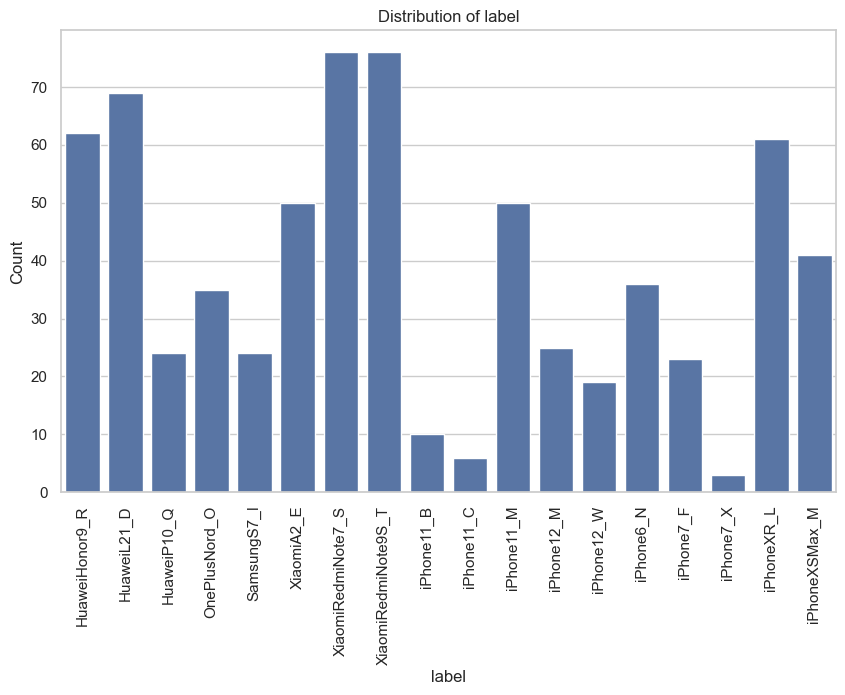

In [19]:
fancyPlots.plot_label_distribution(df_train_bin, "label")

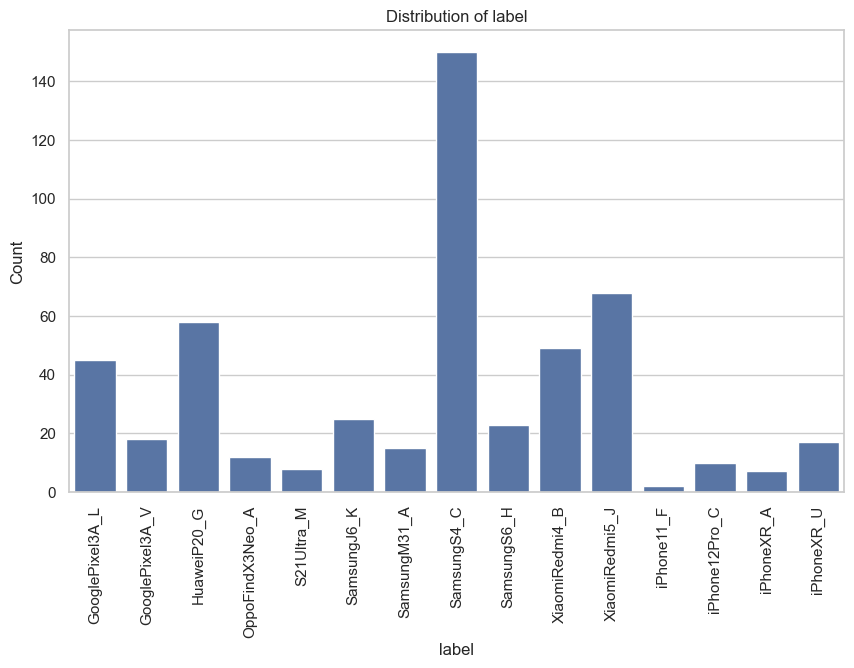

In [20]:
fancyPlots.plot_label_distribution(df_test_bin, "label")

In [38]:
df_train_bin.to_csv(config["DEFAULT"]["train_test_path"] + "bin_train.csv",index=False)
df_test_bin.to_csv(config["DEFAULT"]["train_test_path"] + "bin_test.csv",index=False)

### Train and Test Pair Sets

In [25]:
from itertools import combinations, product
import random

In [39]:
df_train_bin.reset_index(drop=True, inplace=True)
df_test_bin.reset_index(drop=True, inplace=True)

In [40]:
# Function to create balanced train and test sets
def create_balanced_sets(df, test_size=0.8):
    labels = df["label"].unique()
    train_indices = []
    test_indices = []

    for label in labels:
        label_indices = df[df["label"] == label].index.tolist()
        split_index = int(len(label_indices) * (1 - test_size))
        train_indices.extend(label_indices[:split_index])
        test_indices.extend(label_indices[split_index:])

    train_df = df.loc[train_indices].reset_index(drop=True)
    test_df = df.loc[test_indices].reset_index(drop=True)

    return train_df, test_df

In [41]:
# Function to create matching and non-matching pairs
def create_pairs(df, num_pairs):
    pairs = []
    labels = df["label"].unique()

    # Create matching pairs
    matching_pairs = []
    for label in labels:
        label_indices = df[df["label"] == label].index.tolist()
        label_combinations = list(combinations(label_indices, 2))
        matching_pairs.extend([(i, j, 1, label, label) for i, j in label_combinations])

    # Sample matching pairs
    matching_pairs = random.sample(matching_pairs, num_pairs // 2)

    # Create non-matching pairs
    non_matching_pairs = []
    for label1, label2 in combinations(labels, 2):
        label1_indices = df[df["label"] == label1].index.tolist()
        label2_indices = df[df["label"] == label2].index.tolist()
        non_matching_pairs.extend(product(label1_indices, label2_indices))

    # Sample non-matching pairs
    non_matching_pairs = random.sample(non_matching_pairs, num_pairs // 2)

    # Combine pairs
    pairs = matching_pairs + [
        (i, j, -1, df.loc[i, "label"], df.loc[j, "label"])
        for i, j in non_matching_pairs
    ]

    pairs_df = pd.DataFrame(
        pairs, columns=["Item 1", "Item 2", "Equality", "device1", "device2"]
    )
    return pairs_df

In [42]:
# Determine the number of pairs to create
num_pairs = min(
    len(df_train_bin) * (len(df_train_bin) - 1) // 2,
    len(df_test_bin) * (len(df_test_bin) - 1) // 2,
    10000,
)  # Adjust 2000 to your preferred number

# Create pairs for train and test sets with the same number of entries
train_pairs = create_pairs(df_train_bin, num_pairs)
test_pairs = create_pairs(df_test_bin, num_pairs)

In [43]:
train_pairs

,Item 1,Item 2,Equality,device1,device2
0,665,678,1,iPhoneXSMax_M,iPhoneXSMax_M
1,265,303,1,XiaomiRedmiNote7_S,XiaomiRedmiNote7_S
2,367,406,1,XiaomiRedmiNote9S_T,XiaomiRedmiNote9S_T
3,89,114,1,HuaweiL21_D,HuaweiL21_D
4,455,466,1,iPhone11_M,iPhone11_M
...,...,...,...,...,...
9995,249,381,-1,XiaomiA2_E,XiaomiRedmiNote9S_T
9996,62,338,-1,HuaweiL21_D,XiaomiRedmiNote7_S
9997,390,572,-1,XiaomiRedmiNote9S_T,iPhone7_F
9998,409,633,-1,XiaomiRedmiNote9S_T,iPhoneXR_L


In [44]:
train_pairs.to_csv(
    config["DEFAULT"]["train_test_path"] + "bin_train_pairs.csv"
)

In [45]:
test_pairs

,Item 1,Item 2,Equality,device1,device2
0,183,194,1,SamsungS4_C,SamsungS4_C
1,208,235,1,SamsungS4_C,SamsungS4_C
2,189,258,1,SamsungS4_C,SamsungS4_C
3,282,286,1,SamsungS4_C,SamsungS4_C
4,253,304,1,SamsungS4_C,SamsungS4_C
...,...,...,...,...,...
9995,106,243,-1,HuaweiP20_G,SamsungS4_C
9996,116,187,-1,HuaweiP20_G,SamsungS4_C
9997,3,283,-1,GooglePixel3A_L,SamsungS4_C
9998,148,183,-1,SamsungJ6_K,SamsungS4_C


In [47]:
test_pairs.to_csv(
    config["DEFAULT"]["train_test_path"] + "bin_test_pairs.csv"
)